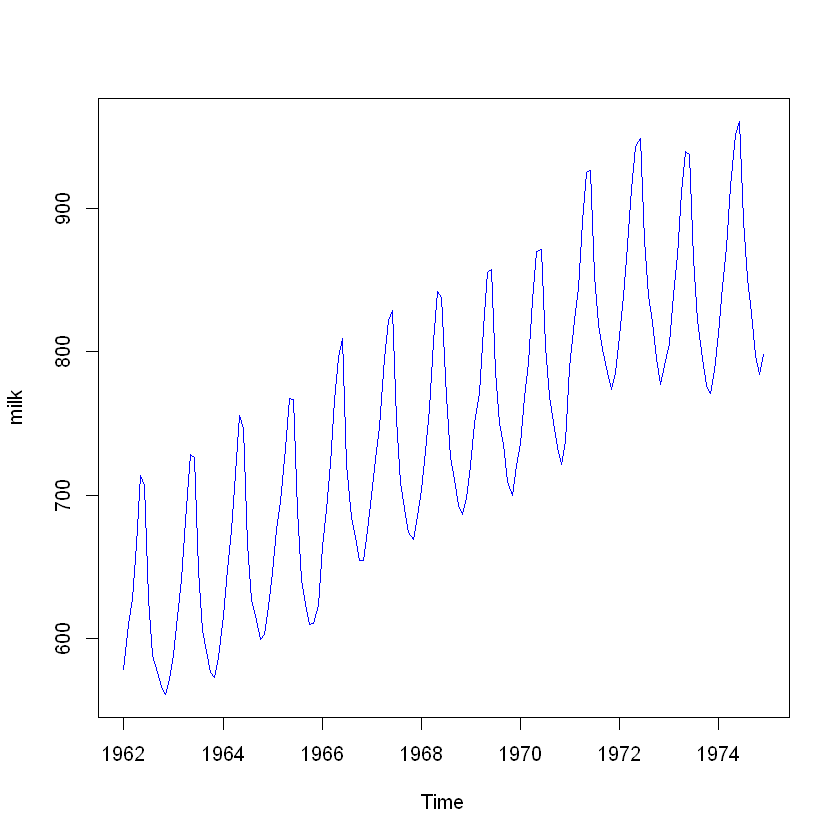

In [83]:
library(astsa)

# read data to R variable
milk.data<-read.csv("milk.csv")

# pull out number of births column
milk<-milk.data$Milk

milk=ts(milk, frequency=12, start=c(1962,01))
plot(milk, col='blue')

Clearly differencing is required for detrending.

In [84]:
print(milk)

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1962 578.3 609.8 628.4 665.6 713.8 707.2 628.4 588.1 576.3 566.5 561.1 571.4
1963 589.1 615.3 641.2 682.8 728.5 726.4 648.0 605.8 591.5 576.3 573.2 587.1
1964 616.6 648.6 675.5 715.3 756.0 746.7 665.7 627.4 612.8 599.9 602.7 622.5
1965 646.1 676.1 696.1 732.5 767.8 767.0 689.3 641.2 624.0 609.7 610.8 623.5
1966 664.7 690.3 722.6 766.0 796.3 809.6 721.7 684.4 670.6 654.9 654.4 675.5
1967 700.1 725.1 748.2 795.4 821.8 828.9 753.1 708.9 690.9 674.5 669.6 685.3
1968 704.0 730.5 760.9 807.6 842.4 838.0 768.8 726.6 711.2 693.2 686.9 698.1
1969 720.7 750.1 770.8 816.7 855.2 857.3 786.5 750.1 735.6 709.9 700.1 720.7
1970 736.4 768.5 792.4 836.0 869.9 871.5 804.1 768.8 750.8 733.4 721.4 737.4
1971 789.4 821.8 844.4 890.8 924.9 926.3 853.2 818.9 801.5 785.5 774.1 785.5
1972 811.0 838.6 873.9 913.1 943.6 948.6 877.8 839.5 820.8 795.3 777.2 790.4
1973 806.1 840.3 867.0 911.1 939.6 937.5 865.0 821.8 795.4 776.6 771.1 787.4

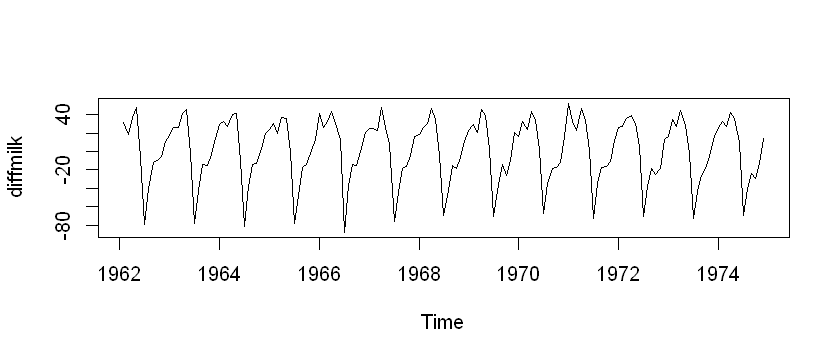

In [85]:
options(repr.plot.width=7, repr.plot.height=3)
diffmilk=diff(milk)
plot(diffmilk)

Let X<sub>t</sub>=milk then diff(X<sub>t</sub>) is stationary hence we take non seasonal difference d=1.

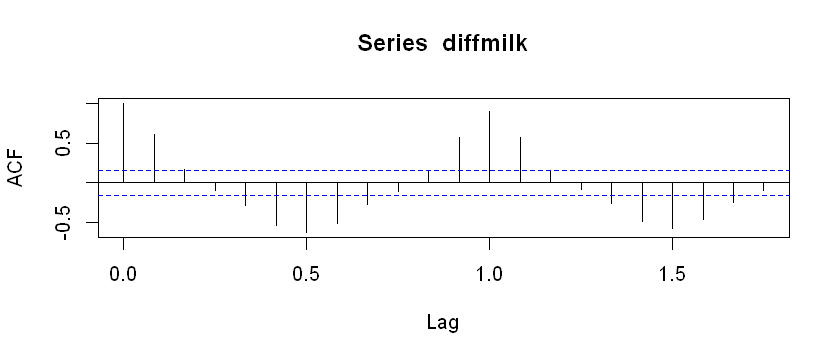

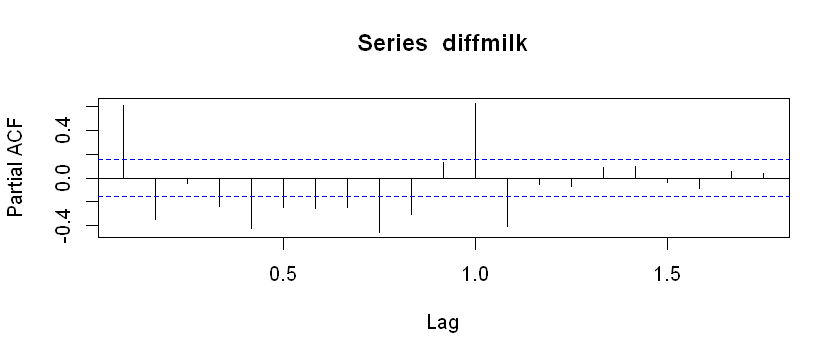

In [86]:
acf(diffmilk)
pacf(diffmilk)

Clearly at lag 12 we have high seasonality from PACF and ACF, try s=12 and D=1

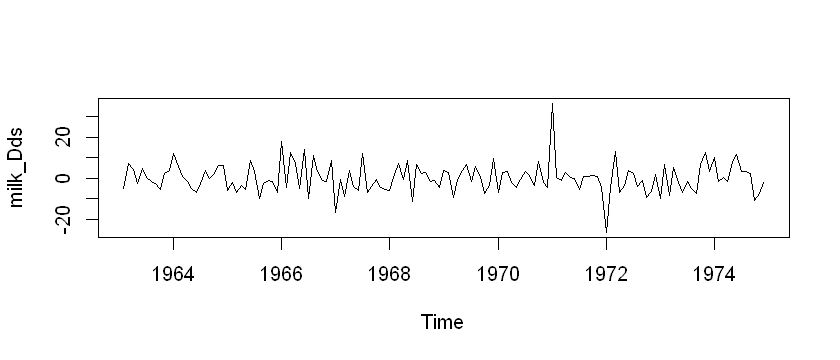

In [87]:
milk_Dds=diff(diffmilk,12)
plot(milk_Dds)

We assume above is stationary data assuming 1971 and 1972 spikes as outliers. We proceed with d=1(non-seasonal), D=1(seasonal) and s=12(seasonal)

In [88]:
Box.test(milk_Dds, lag=log(length(milk_Dds)))


	Box-Pierce test

data:  milk_Dds
X-squared = 3.6537, df = 4.9628, p-value = 0.5952


Ljung Box test thinks that this is already a White noise since we fail to reject the null hypothesis that all ACFs are 0 upto log(length) lags. Therefore we can conclude ALREADY p=0,q=0,P=0, Q=0 ie <center>
 <h2>   (1−𝐵)(1−𝐵<sup>12</sup>)X<sub>𝑡</sub>=𝑍<sub>𝑡</sub><br><br>


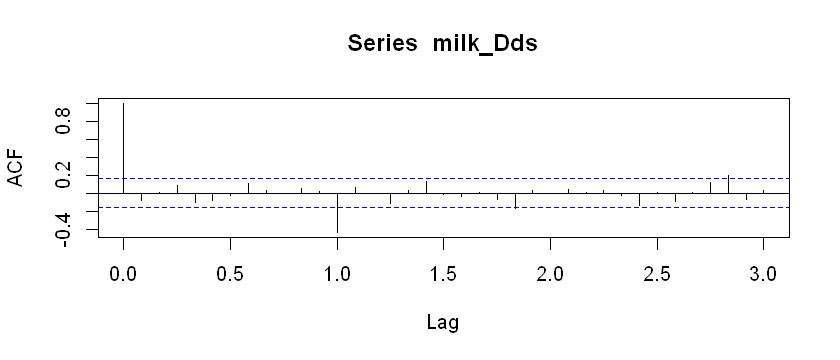

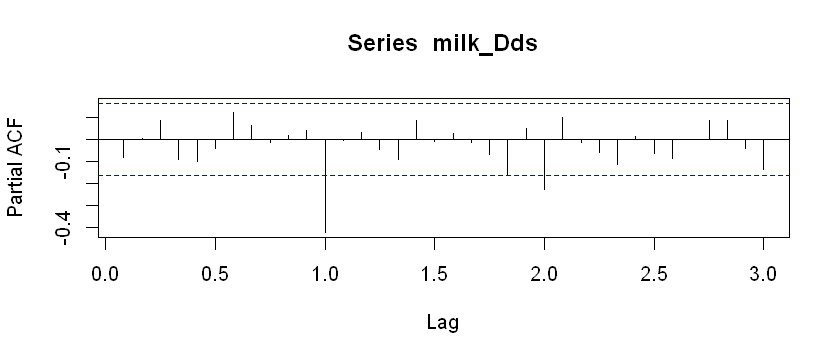

In [89]:
acf(milk_Dds, lag.max=36)
pacf(milk_Dds, lag.max=36)

The ACF/PACF looks like that for a white noise and at Lag=1(ie s=12) seems coincidental.

$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))


sigma^2 estimated as 50.41:  log likelihood = -483.2,  aic = 968.4

$degrees_of_freedom
[1] 143

$ttable
     Estimate p.value

$AIC
[1] 6.28829

$AICc
[1] 6.28829

$BIC
[1] 6.307529


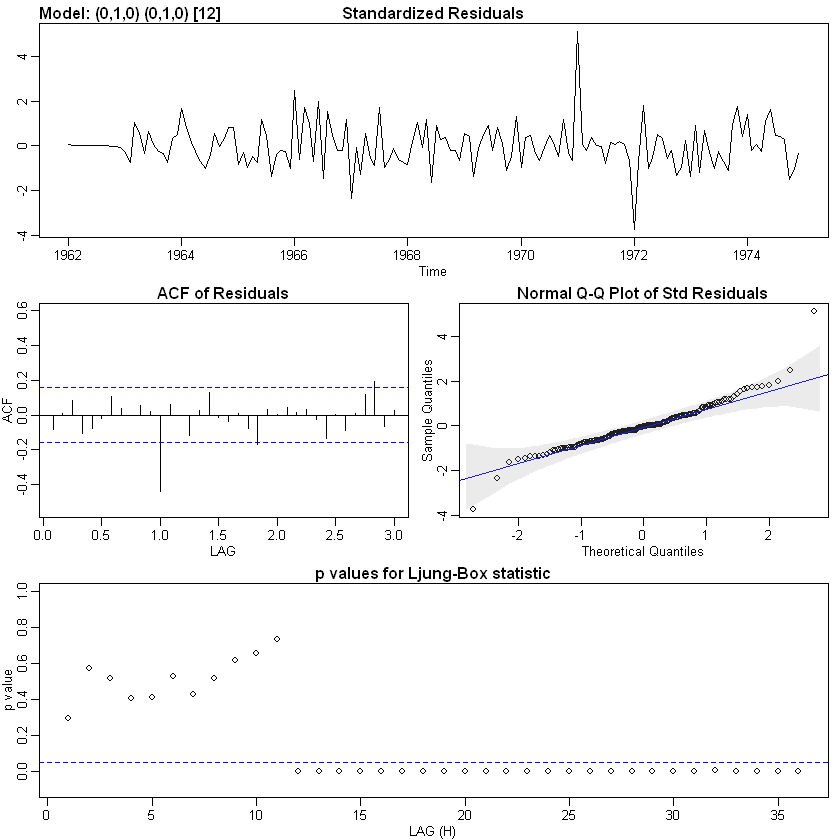

In [90]:
options(repr.plot.width=7, repr.plot.height=7)
sarima(milk,0,1,0,0,1,0,12)

In [91]:
model<-arima(x=milk, order = c(0,1,0), seasonal = list(order=c(0,1,0), period=12))
model


Call:
arima(x = milk, order = c(0, 1, 0), seasonal = list(order = c(0, 1, 0), period = 12))


sigma^2 estimated as 50.41:  log likelihood = -483.2,  aic = 968.4

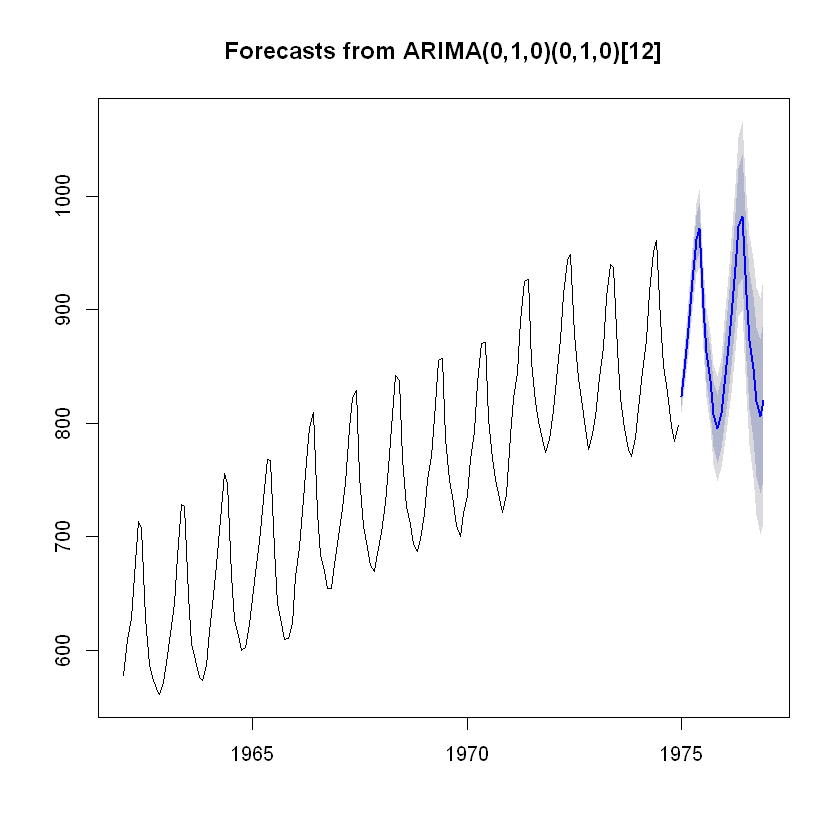

In [92]:
library(forecast)
plot(forecast(model))

## We will still check Non-white noise models:

The ACF tells us about MA:
<li>
we must have MA(q=0) <li>
we must also have seasonally (Q=0,1,2,3,4) (taken as since period s=12)

The PACF tells us about AR: <LI>
we must have AR(p=0) <LI>
we must also have seasonally (P=0,1,2) (taken as since period s=12)

In [93]:
library(astsa)
library(forecast)

d=NULL
DD=NULL
d=1
DD=1

per=12
for(p in 1:1){
  for(q in 1:1){
    for(i in 1:3){
      for(j in 1:4){
        if(p+d+q+i+DD+j<=10){
          model<-arima(x=milk, order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1,i-1,DD,j-1,per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}

0 1 0 0 1 0 12 AIC= 968.3966  SSE= 7213.013  p-VALUE= 0.4393367 
0 1 0 0 1 1 12 AIC= 923.3288  SSE= 4933.349  p-VALUE= 0.6493728 
0 1 0 0 1 2 12 AIC= 925.3072  SSE= 4931.398  p-VALUE= 0.6529998 
0 1 0 0 1 3 12 AIC= 927.2329  SSE= 4925.911  p-VALUE= 0.6640233 
0 1 0 1 1 0 12 AIC= 938.6402  SSE= 5668.197  p-VALUE= 0.493531 
0 1 0 1 1 1 12 AIC= 925.3063  SSE= 4931.428  p-VALUE= 0.6531856 
0 1 0 1 1 2 12 AIC= 927.3036  SSE= 4931.135  p-VALUE= 0.6537708 
0 1 0 1 1 3 12 AIC= 929.2146  SSE= 4924.747  p-VALUE= 0.6627108 
0 1 0 2 1 0 12 AIC= 932.6438  SSE= 5308.012  p-VALUE= 0.6004804 
0 1 0 2 1 1 12 AIC= 927.2797  SSE= 4929.733  p-VALUE= 0.657349 
0 1 0 2 1 2 12 AIC= 926.8053  SSE= 4618.498  p-VALUE= 0.6826743 


## We finally choose (0,1,0,0,1,1,12)

initial  value 1.960071 
iter   2 value 1.820277
iter   3 value 1.808696
iter   4 value 1.803385
iter   5 value 1.802687
iter   6 value 1.800218
iter   7 value 1.800130
iter   8 value 1.800128
iter   9 value 1.800127
iter   9 value 1.800127
iter   9 value 1.800127
final  value 1.800127 
converged
initial  value 1.797249 
iter   2 value 1.795522
iter   3 value 1.795498
iter   4 value 1.795498
iter   4 value 1.795498
final  value 1.795498 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
         sma1
      -0.6750
s.e.   0.0752

sigma^2 estimated as 34.47:  log likelihood = -459.66,  aic = 923.33

$degrees_of_freedom
[1] 142

$ttable
     Estimate     SE t.value p.value
sma1   -0.675 0.0752 -8.9785       0

$AIC
[1] 5.995642

$AICc
[1] 5.995812

$BIC
[1] 6.03412


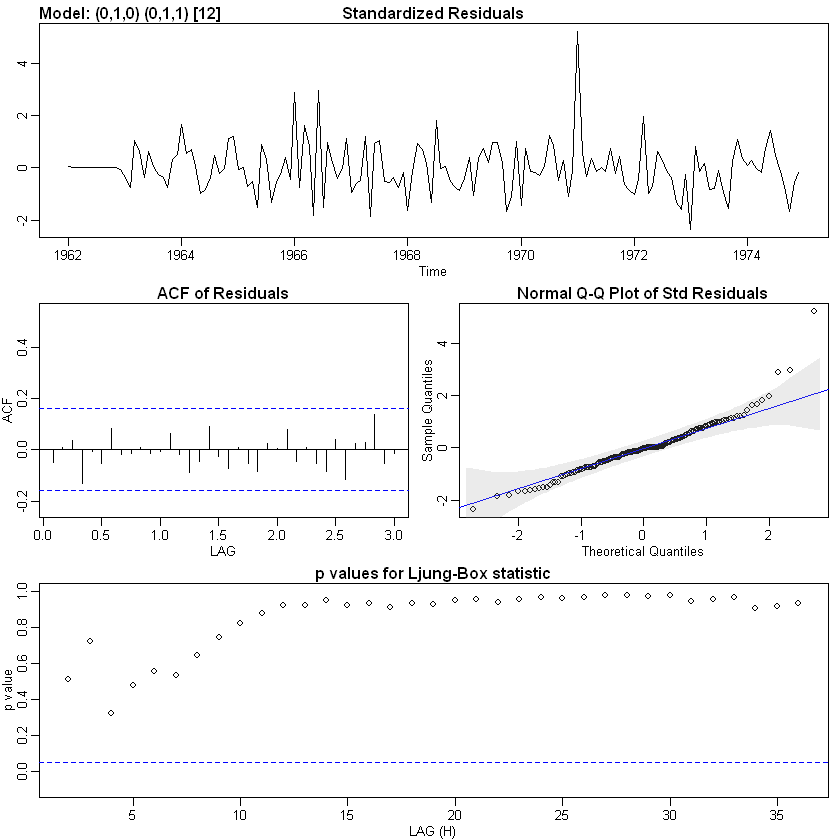

In [94]:
sarima(milk,0,1,0,0,1,1,12)

Estimated model:<br><h2><Center>𝑋<sub>𝑡</sub>=Milk <br><br>
    (1−𝐵)(1−𝐵<sup>12</sup>)X<sub>𝑡</sub>=(1+𝜃𝐵<sup>12</sup>)𝑍<sub>𝑡</sub><br><br>
    𝜃=-0.6750 <br><br>
    𝑍<sub>𝑡</sub>~𝑁𝑜𝑟𝑚𝑎𝑙(0,34.47)
    

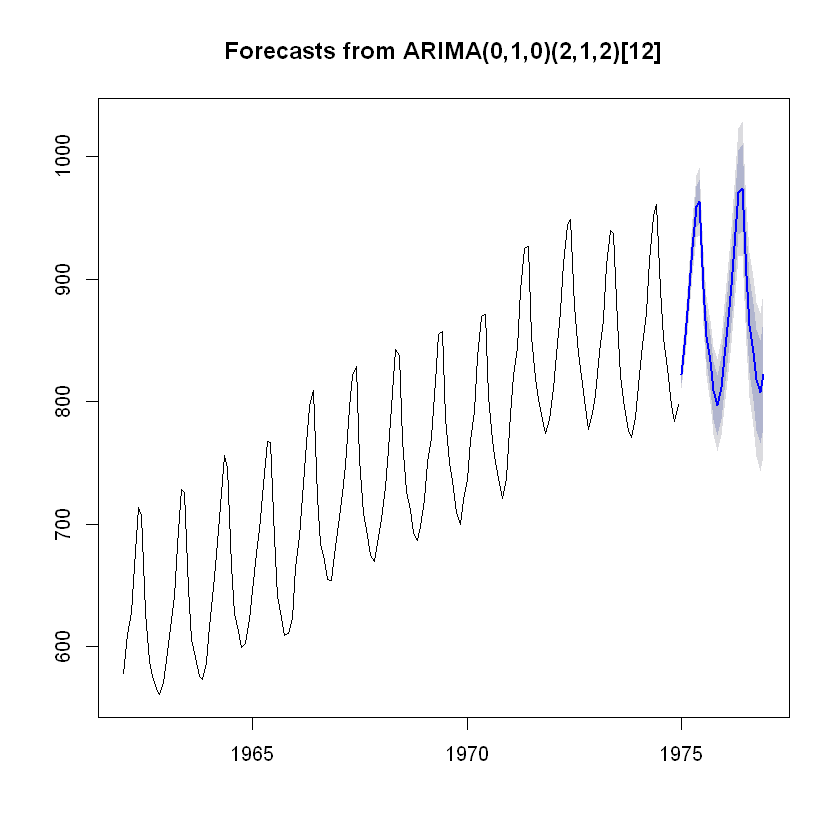

In [95]:
plot(forecast(model))

In [96]:
forecast(model)

         Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
Jan 1975       822.4321 815.0130  829.8512 811.0855  833.7787
Feb 1975       853.6875 843.1996  864.1754 837.6476  869.7273
Mar 1975       883.5657 870.7225  896.4090 863.9237  903.2078
Apr 1975       925.7097 910.8806  940.5388 903.0306  948.3888
May 1975       959.1666 942.5878  975.7453 933.8116  984.5215
Jun 1975       963.2567 945.0961  981.4173 935.4825  991.0309
Jul 1975       892.2568 872.6415  911.8721 862.2578  922.2558
Aug 1975       853.6080 832.6386  874.5773 821.5381  885.6778
Sep 1975       832.5967 810.3556  854.8378 798.5819  866.6115
Oct 1975       809.1508 785.7069  832.5948 773.2964  845.0052
Nov 1975       797.0964 772.5084  821.6845 759.4923  834.7006
Dec 1975       811.5972 785.9160  837.2784 772.3212  850.8732
Jan 1976       837.1044 809.5092  864.6996 794.9012  879.3077
Feb 1976       868.8972 839.5112  898.2831 823.9552  913.8391
Mar 1976       894.7703 863.6967  925.8440 847.2473  942.2934
Apr 1976